# Outfits Exploration  
In this notebook, I explore the outfits.  

**Notes:**
*   Tags will not be addressed here; they are covered in *outfit_tags.ipynb*.
*   All prices are in NOK (approximately 0.1 USD or 0.3 ILS, according to Google, depending on the exchange rate).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/RecSys_206894495'

In [ ]:
!pip install pyarrow

import warnings
warnings.filterwarnings('ignore')

#Import libreirs
import pandas as pd
import numpy as np
import re

#Visulizetion
import seaborn as sns
import matplotlib.pyplot as plt


#Garbage collector
import gc

#Random
import random
#Set random seed
RSEED = 10
random.seed(RSEED)

In [ ]:
outfits=pd.read_parquet(path+'/archive/data/outfits.parquet',engine='pyarrow')
outfits.head()

,id,name,description,group,owner,timeCreated,retailPrice,pricePerWeek,pricePerMonth,outfit_tags,tag_categories
0,outfit.fffdaa715c3646f8b1c0f04d549ff07e,Out of stock - Asymmetric Frilled Dress,"This fun, short dress features and asymmetric ...",group.50a586c78eb7626e294ba3bd07d12c79,o_00053,2017-12-30 11:28:01.000,4000.0,600.0,1200.0,"['Synthetic', 'Statement', 'Dresses', 'Metalli...","['Material', 'Occasion', 'Category', 'Details'..."
1,outfit.fffa1b9a3db6415d806f3c48f8ab58d9,Yellow Shell Mellomholmene Blouse,This beautiful blouse features an adjustable n...,group.61ad2fcabb3e9197e3836376e6b67f2c,o_00577,2021-06-07 12:07:22.921,1300.0,590.0,1180.0,"['ILAG', 'Tops', 'Spring', 'Summer', 'M', 'Pat...","['Brand', 'Category', 'Seasons', 'Seasons', 'S..."
2,outfit.fff175b13ceb453f9928625491412ede,Kaula Dress Black,Kaula from Rodebjer is a fitted dress made in ...,group.37c2b59d63d3a9c2d58e07f532f71f7f,o_00336,2023-06-05 09:17:59.004,3100.0,930.0,1860.0,"['Black', 'Mini', 'M', 'Everyday', 'Multi Seas...","['Color', 'Length', 'Size', 'Occasion', 'Seaso..."
3,outfit.ffef9d7c292a48b69076d2df2e32352f,For sale - Jarvis Blouse,This wrap blouse has mid length sleeves and a ...,group.dfcaa57546b0b7a5e9eb204449b6cc1c,o_00030,2021-05-18 14:02:28.690,1500.0,590.0,1180.0,"['XS', 'Multi Season', 'Stylein', 'Tops', 'Cot...","['Size', 'Seasons', 'Brand', 'Category', 'Mate..."
4,outfit.ffeef842238f4dbdabc6c730a75aa2bd,Black Amber Pants,"Feel slack and nice dressed with this pant, ma...",group.ee297c977905eb21a123a4aea5fbb6d2,o_00602,2021-07-16 14:02:30.643,1200.0,590.0,1180.0,"['Cotton', 'Black', 'Everyday', 'Knitwear', 'L...","['Material', 'Color', 'Occasion', 'Category', ..."


In [ ]:
outfits.shape

(15649, 11)

In [ ]:
outfits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15649 entries, 0 to 15648
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              15649 non-null  object        
 1   name            15647 non-null  object        
 2   description     15261 non-null  object        
 3   group           15626 non-null  object        
 4   owner           15649 non-null  object        
 5   timeCreated     15649 non-null  datetime64[ns]
 6   retailPrice     14489 non-null  float64       
 7   pricePerWeek    15649 non-null  float64       
 8   pricePerMonth   15649 non-null  float64       
 9   outfit_tags     15649 non-null  object        
 10  tag_categories  15649 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.3+ MB


In [ ]:
outfits['owner'].nunique()

763

In [ ]:
outfits['group'].nunique()

9755

In [ ]:
outfits.columns

Index(['id', 'name', 'description', 'group', 'owner', 'timeCreated',
       'retailPrice', 'pricePerWeek', 'pricePerMonth', 'outfit_tags',
       'tag_categories'],
      dtype='object')

In [ ]:
# Count the unique groups
unique_groups_count = outfits['group'].nunique()

# Count the unique owners
unique_owners_count = outfits['owner'].nunique()

print(f"Count of unique groups: {unique_groups_count}")
print(f"Count of unique owners: {unique_owners_count}")

Count of unique groups: 9755
Count of unique owners: 763


In [ ]:
display(outfits[['retailPrice','pricePerWeek','pricePerMonth']].describe())

,retailPrice,pricePerWeek,pricePerMonth
count,14489.000000,15649.000000,15649.000000
mean,2669.603699,671.649243,1314.044092
std,2806.482337,214.061838,461.288772
min,0.000000,0.000000,0.000000
25%,1500.000000,590.000000,1180.000000
50%,2000.000000,590.000000,1180.000000
75%,3000.000000,810.000000,1620.000000
max,80000.000000,5250.000000,10500.000000


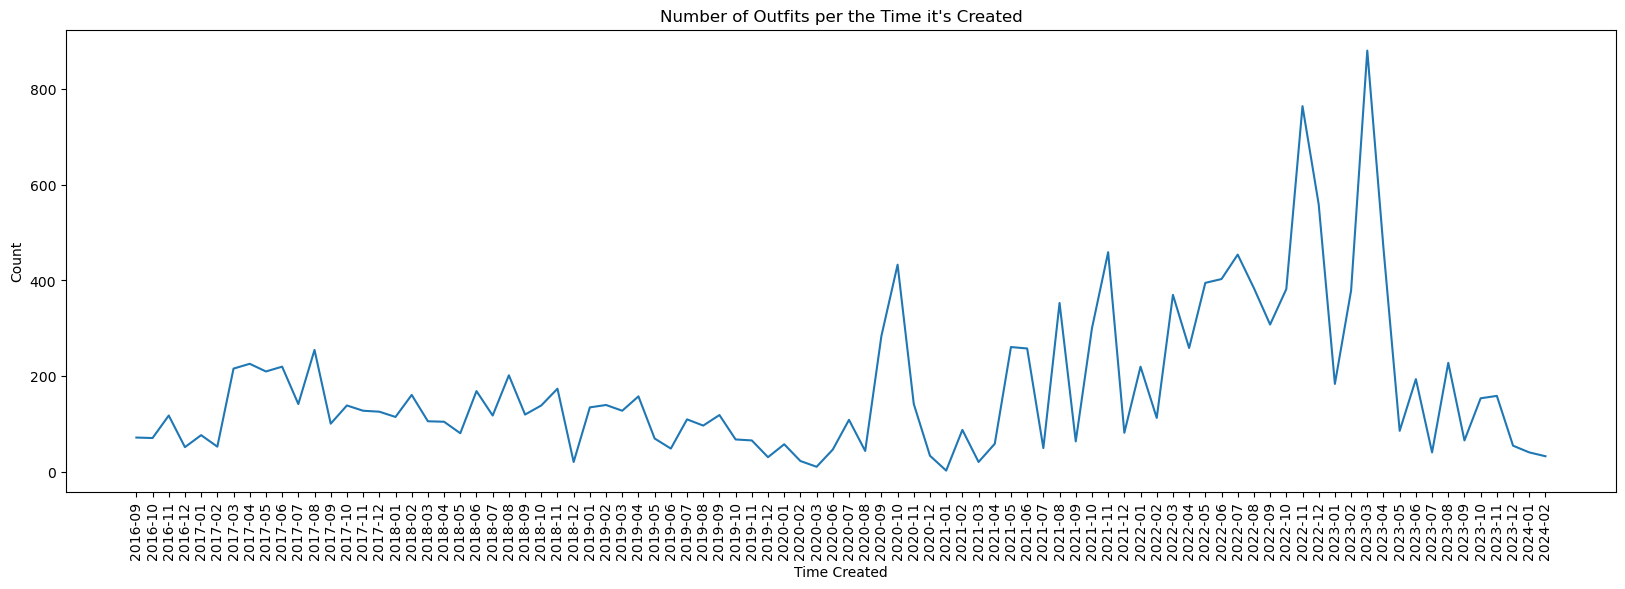

In [ ]:
# Group by timestamp and count the number of ratings and tags
outfits_per_timeCreated = outfits.groupby(outfits['timeCreated'].dt.to_period('M')).size()

# Plotting the data
plt.figure(figsize=(20, 6))
plt.plot(outfits_per_timeCreated.index.astype(str), outfits_per_timeCreated.values, label='Number of Outfits')
plt.xlabel('Time Created')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Number of Outfits per the Time it\'s Created')
plt.show()

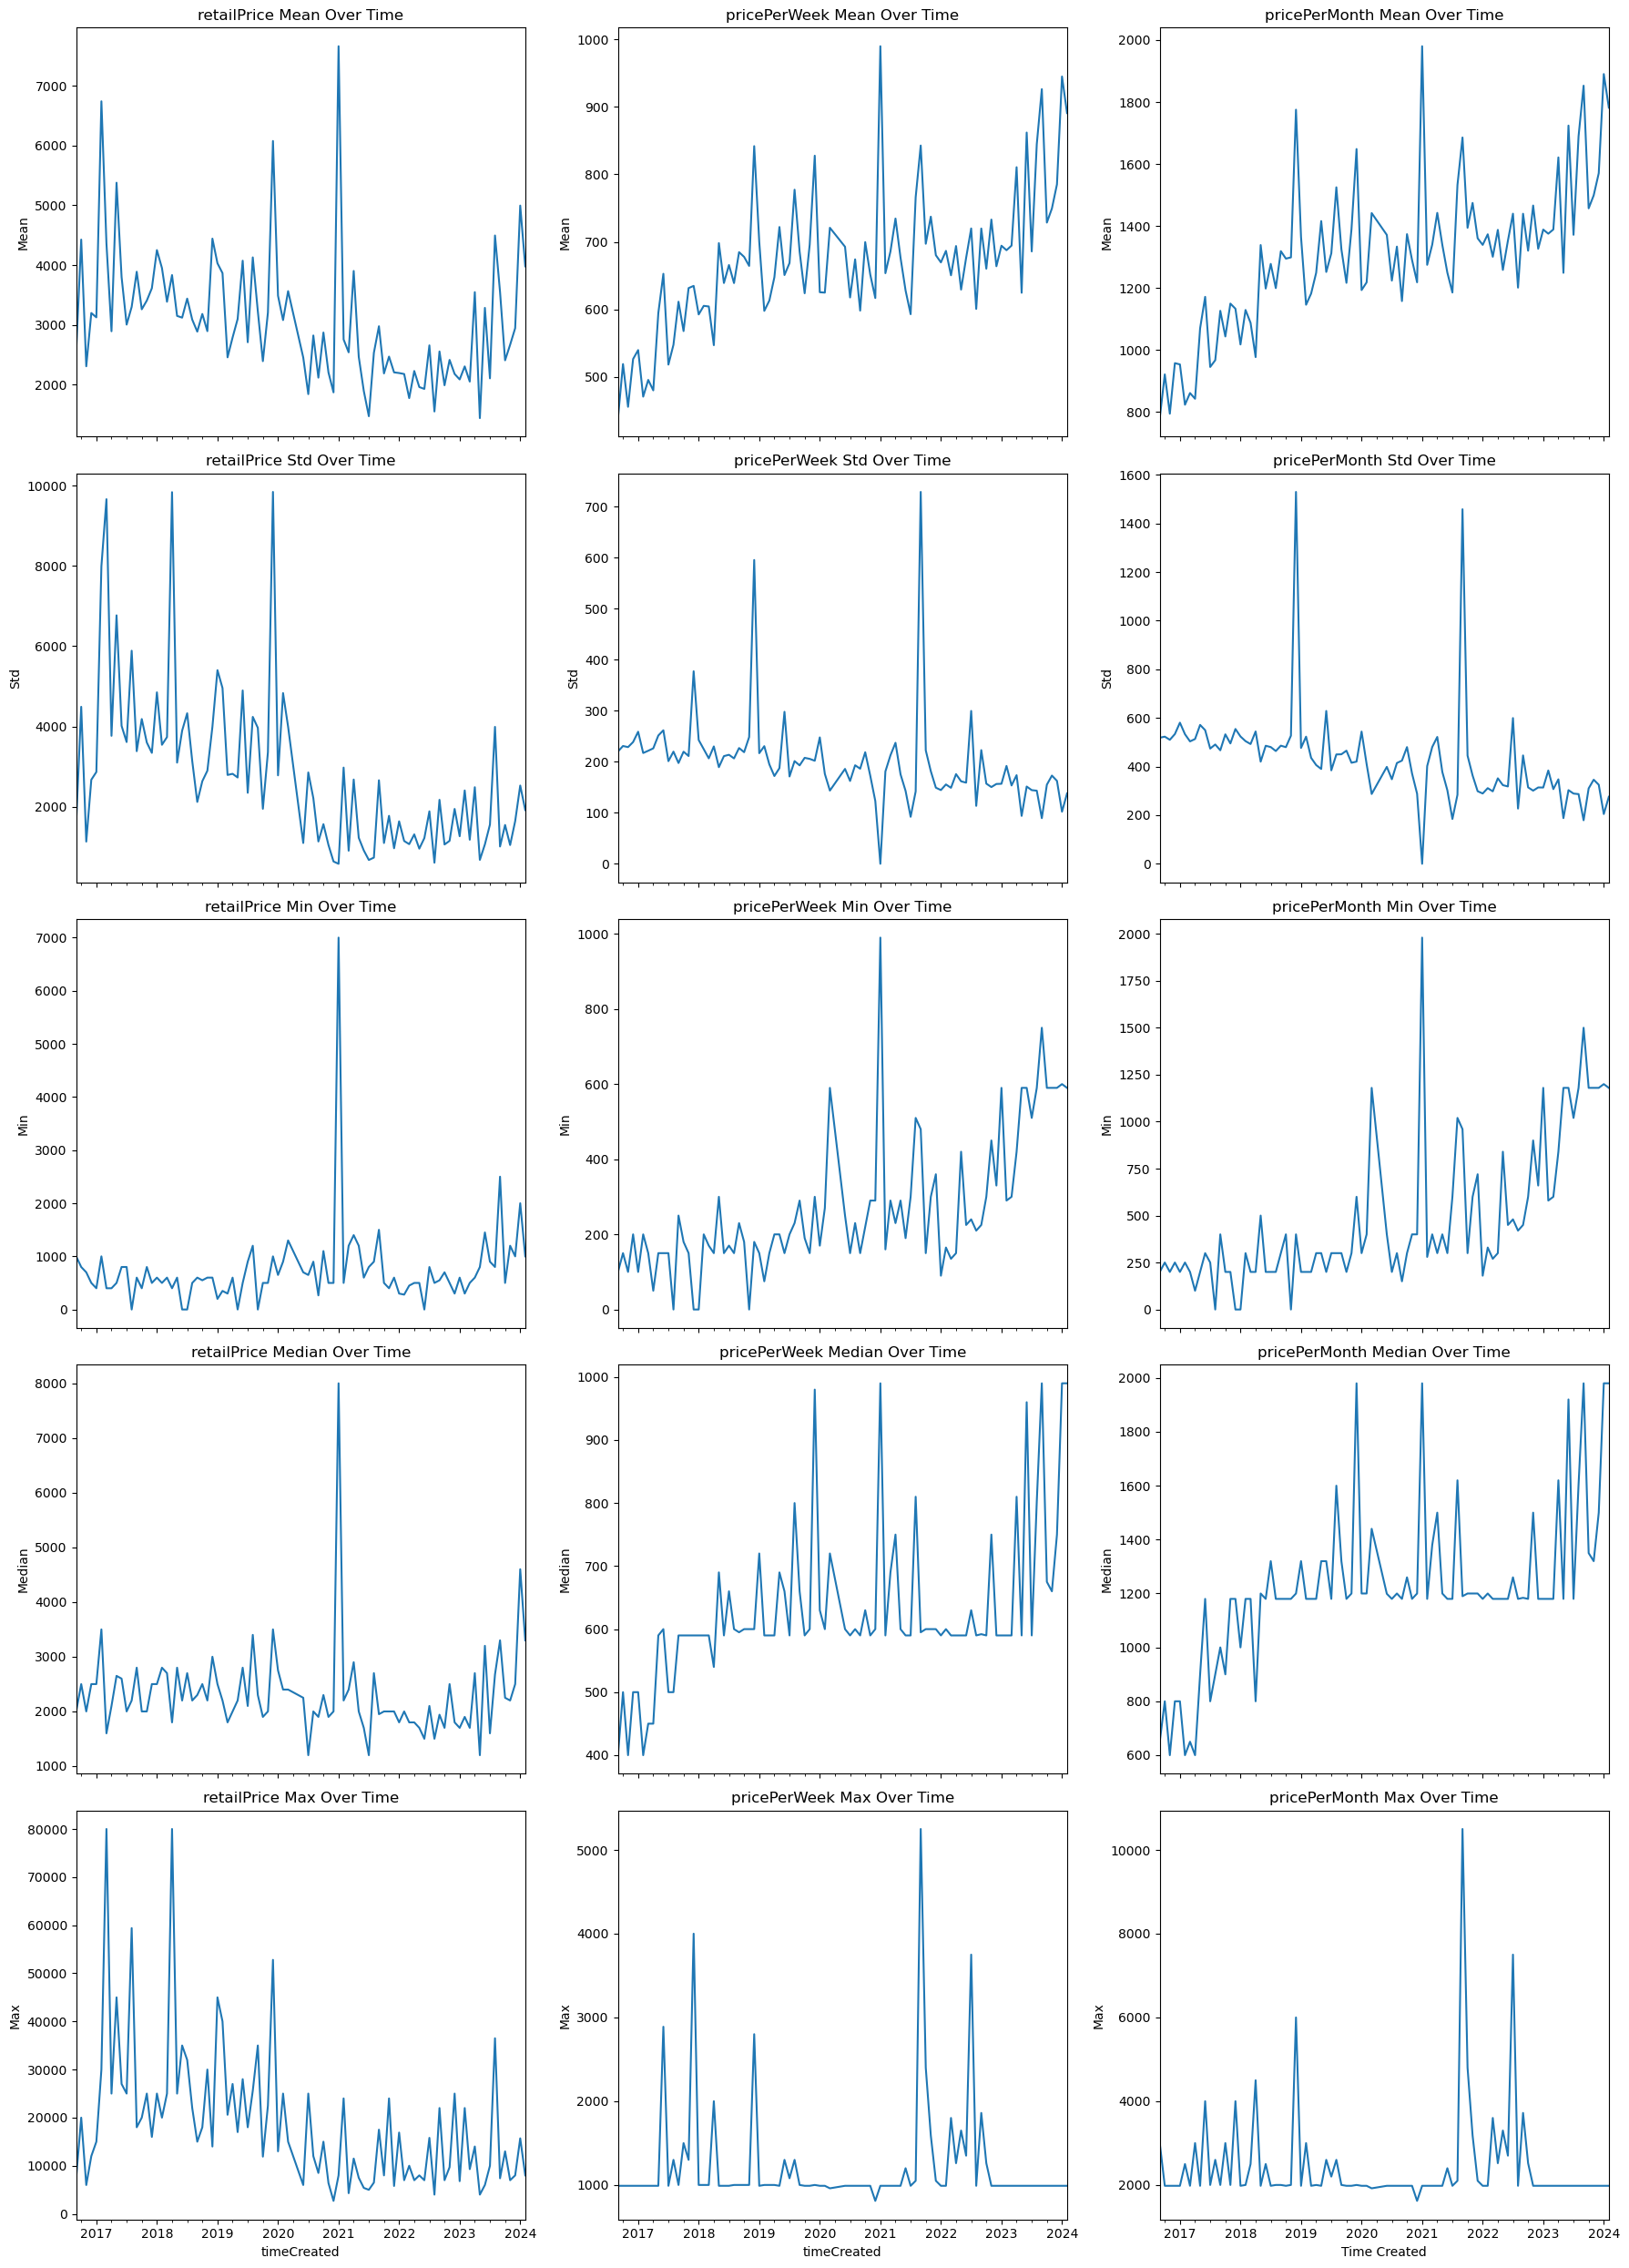

In [ ]:
# Group by month of creation and calculate the required statistics
outfits_per_month = outfits.groupby(outfits['timeCreated'].dt.to_period('M')).agg(['mean', 'std', 'min', 'median', 'max'])

# Plotting the statistics over time for 'retailPrice', 'pricePerWeek', 'pricePerMonth'
fig, axes = plt.subplots(5, 3, figsize=(18, 25), sharex=True)
axes = axes.flatten()

columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
stats = ['mean', 'std', 'min', 'median', 'max']

for i, stat in enumerate(stats):
    for j, column in enumerate(columns):
        outfits_per_month[column][stat].plot(ax=axes[i * 3 + j], title=f'{column} {stat.capitalize()} Over Time')
        axes[i * 3 + j].set_ylabel(stat.capitalize())

plt.xlabel('Time Created')
plt.tight_layout()
plt.show()

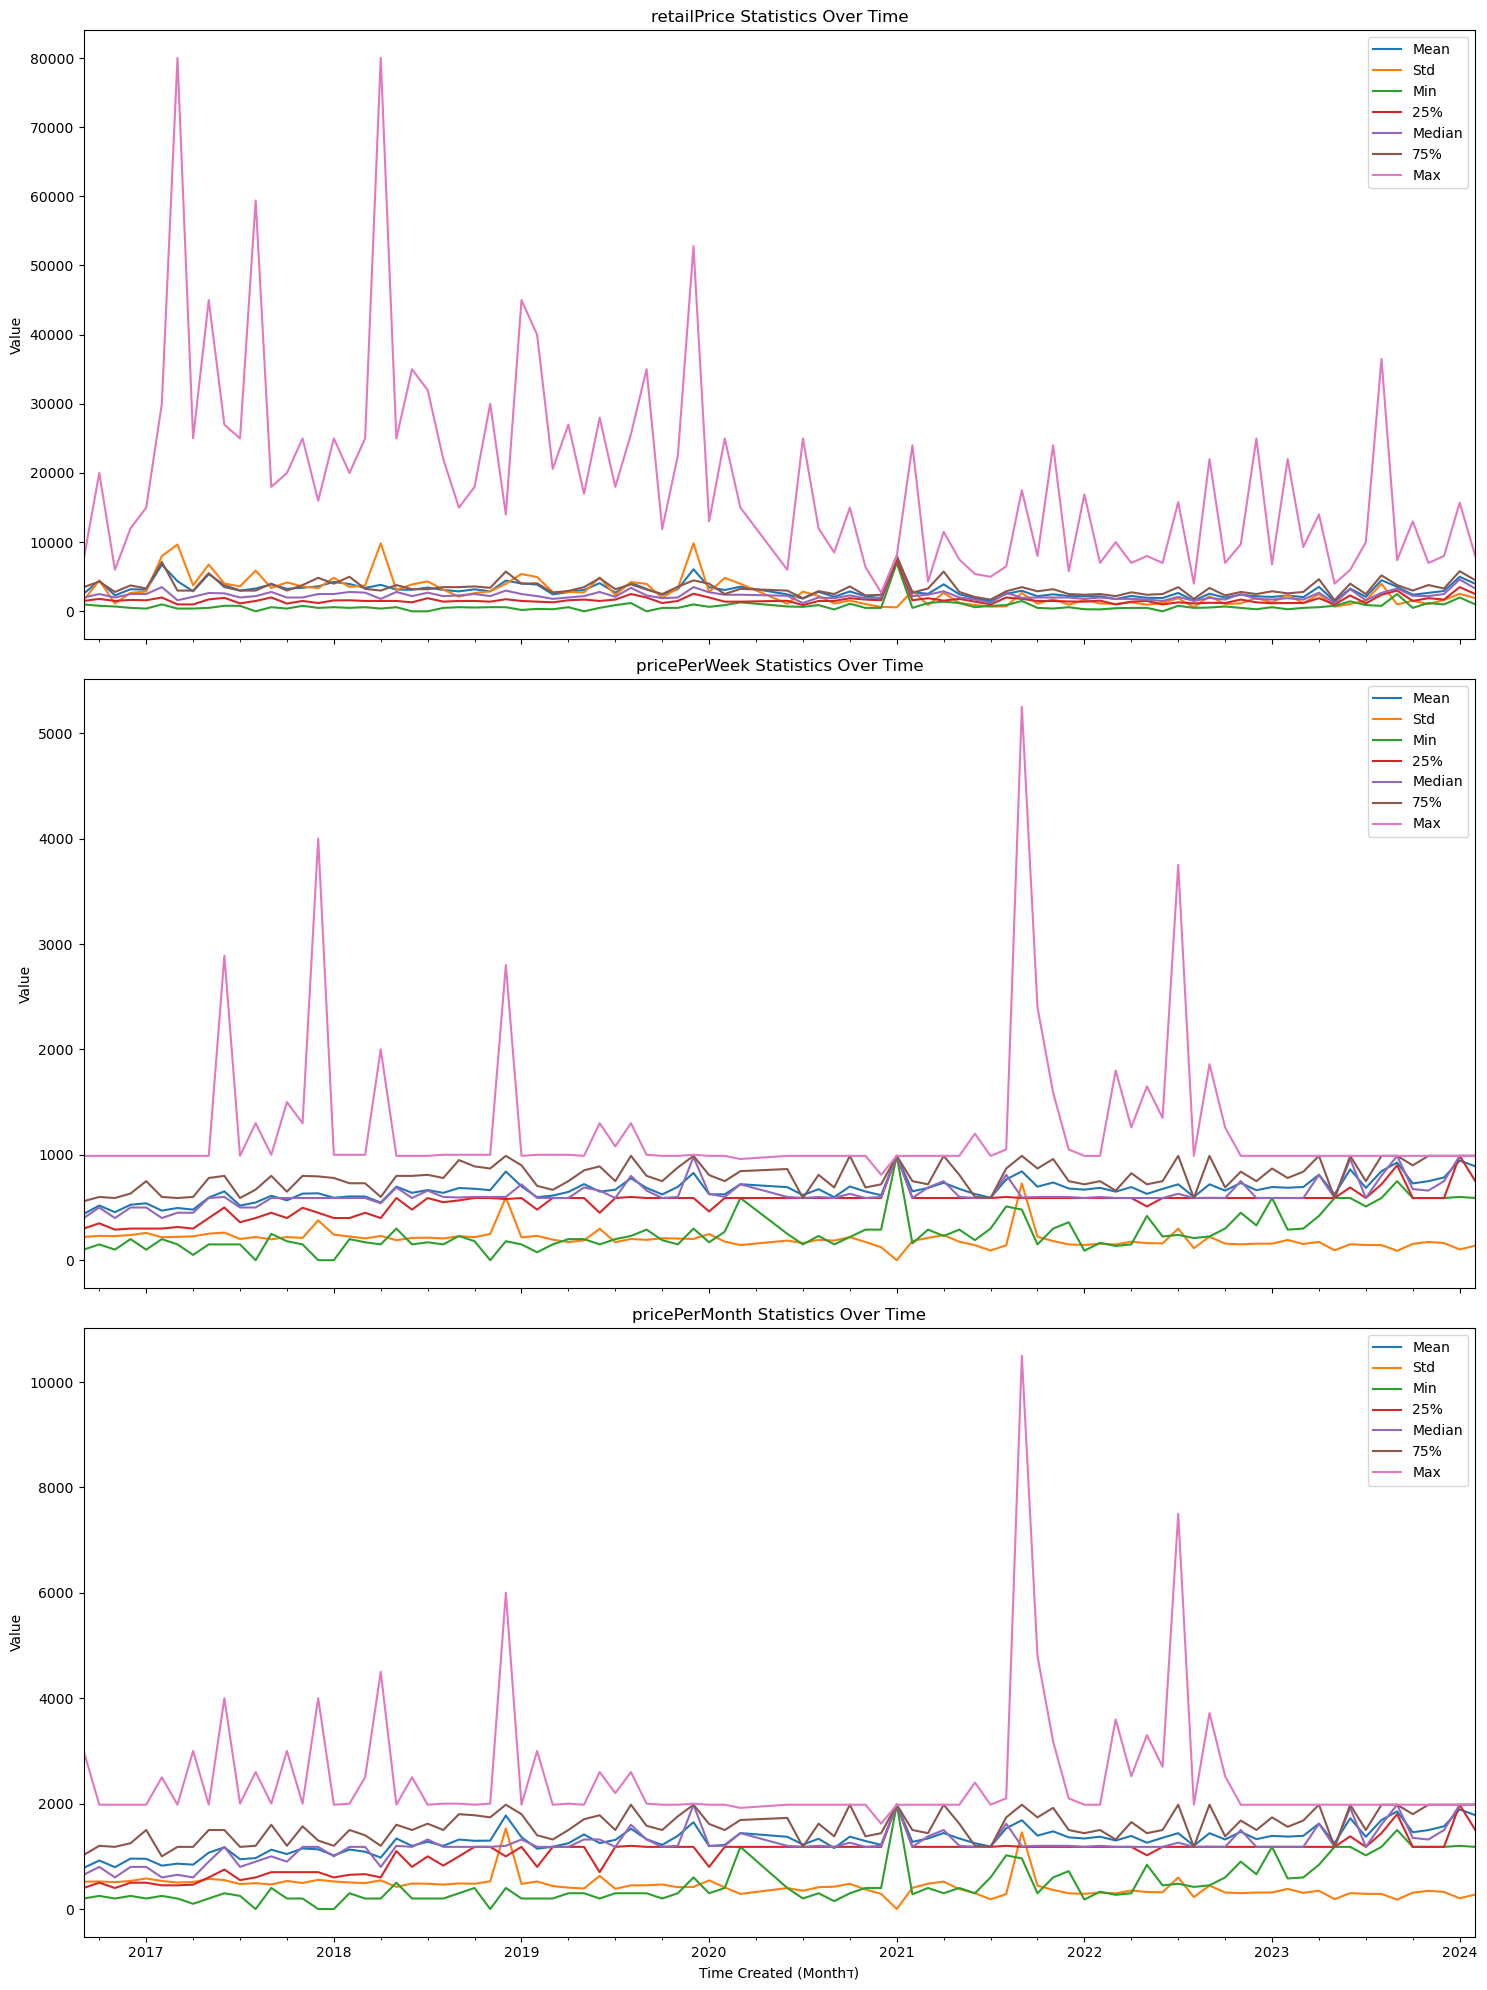

In [ ]:
# Group by month of creation and calculate the required statistics
outfits_per_month = outfits.groupby(outfits['timeCreated'].dt.to_period('M')).agg(['mean', 'std', 'min', 'median', 'max'])

# Calculate the 25th and 75th percentiles separately
quantiles = outfits.groupby(outfits['timeCreated'].dt.to_period('M')).quantile([0.25, 0.75]).unstack(level=-1)
quantiles.columns = pd.MultiIndex.from_product([quantiles.columns.levels[0], ['25%', '75%']])

# Merge the quantiles with the other statistics
outfits_per_month = pd.concat([outfits_per_month, quantiles], axis=1)

# Plotting the statistics over time for 'retailPrice', 'pricePerWeek', 'pricePerMonth'
fig, axes = plt.subplots(3, 1, figsize=(15, 20), sharex=True)

columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']
stats = ['mean', 'std', 'min', '25%', 'median', '75%', 'max']

for i, column in enumerate(columns):
    for stat in stats:
        outfits_per_month[column][stat].plot(ax=axes[i], label=stat.capitalize())
    axes[i].set_title(f'{column} Statistics Over Time')
    axes[i].set_ylabel('Value')
    axes[i].legend()

plt.xlabel('Time Created (Monthד)')
plt.tight_layout()
plt.show()


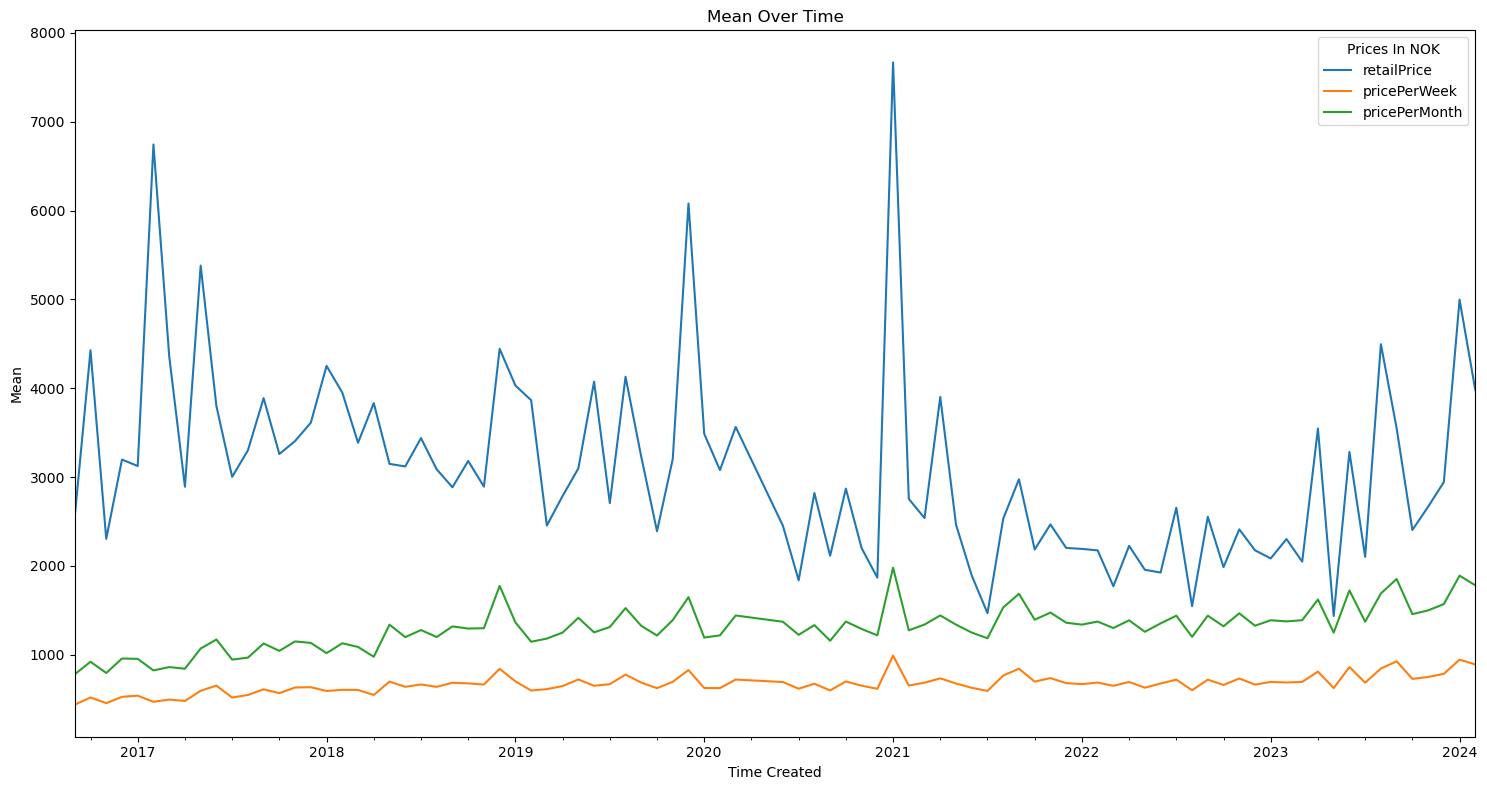

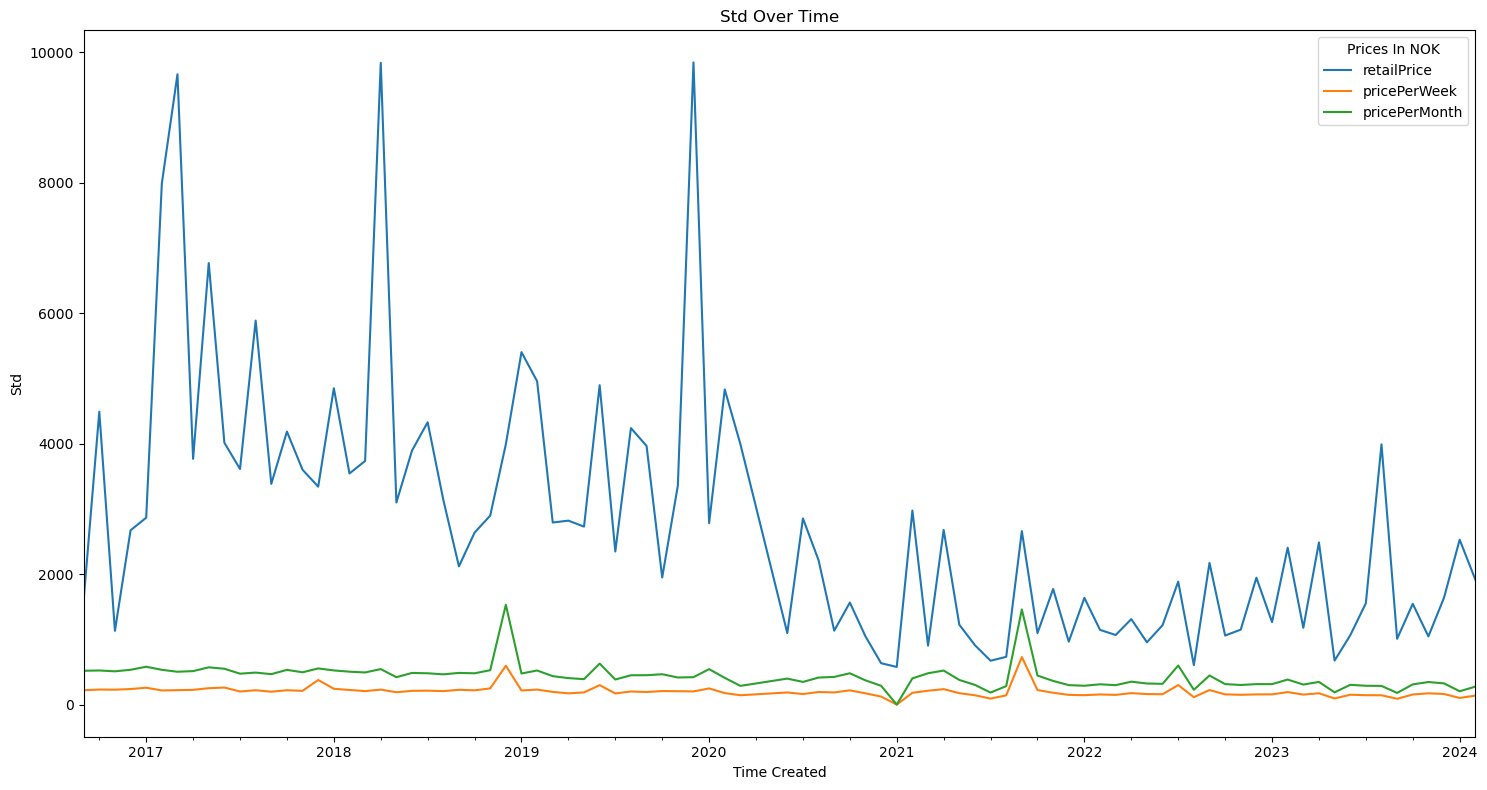

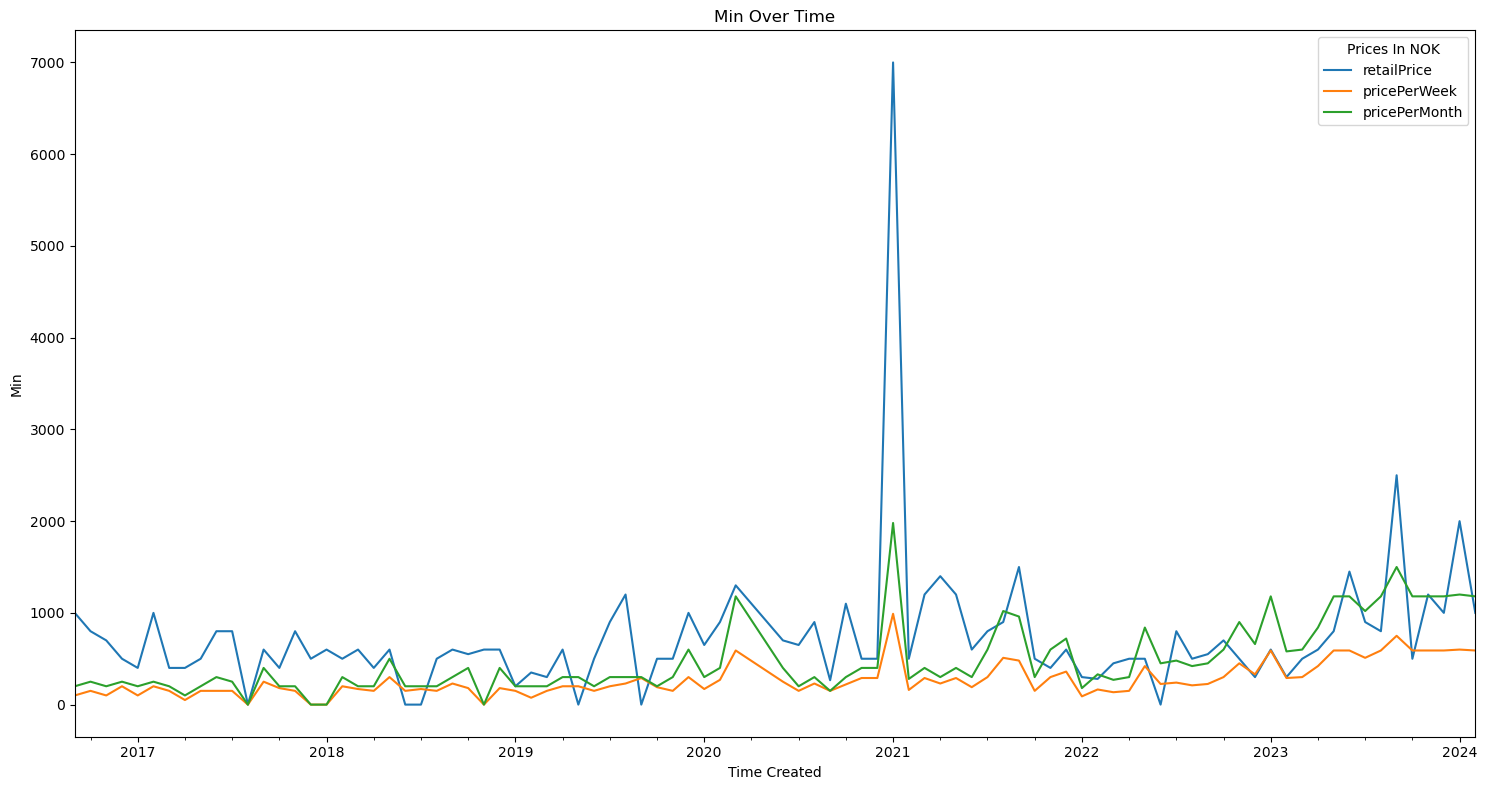

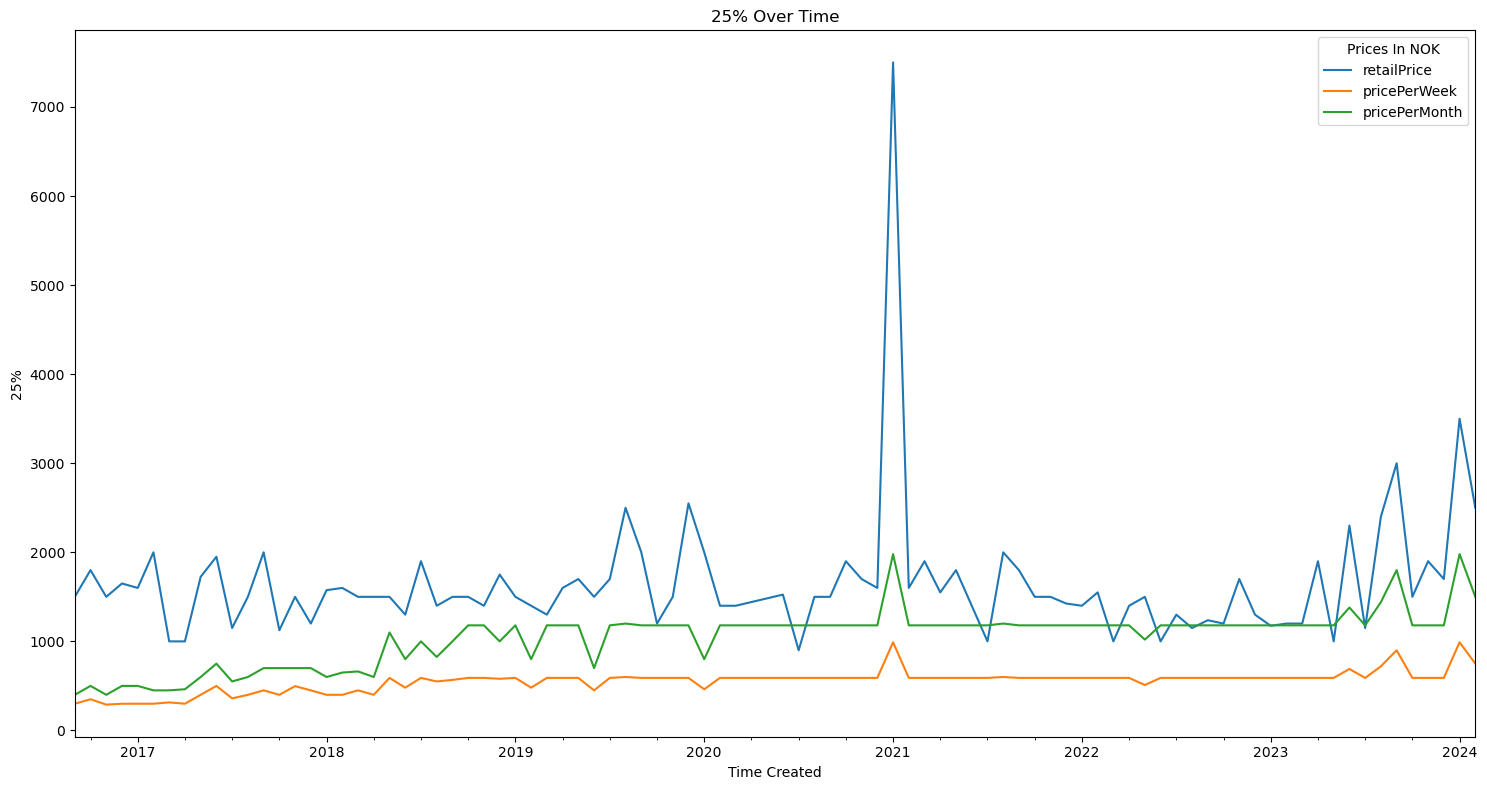

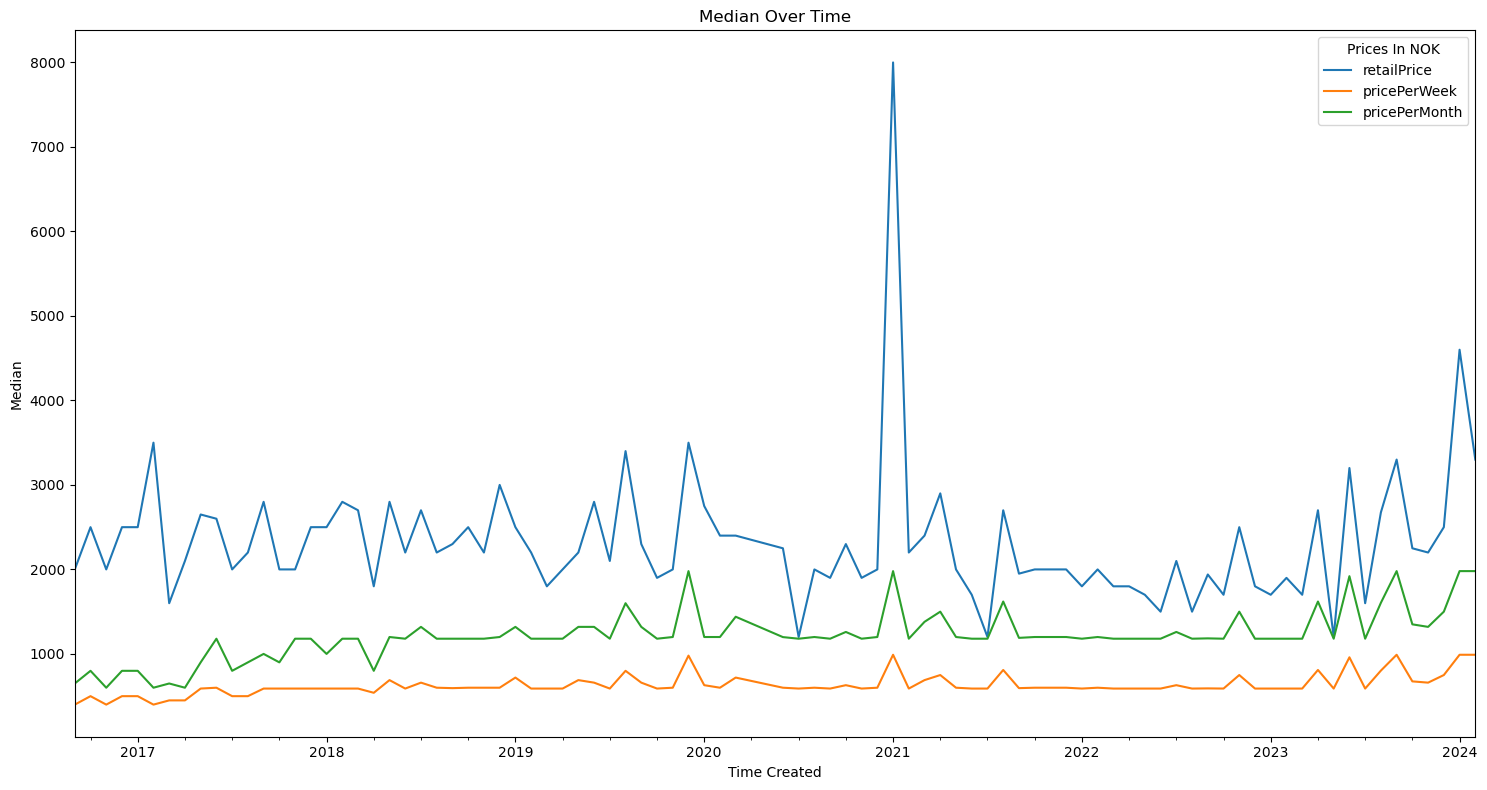

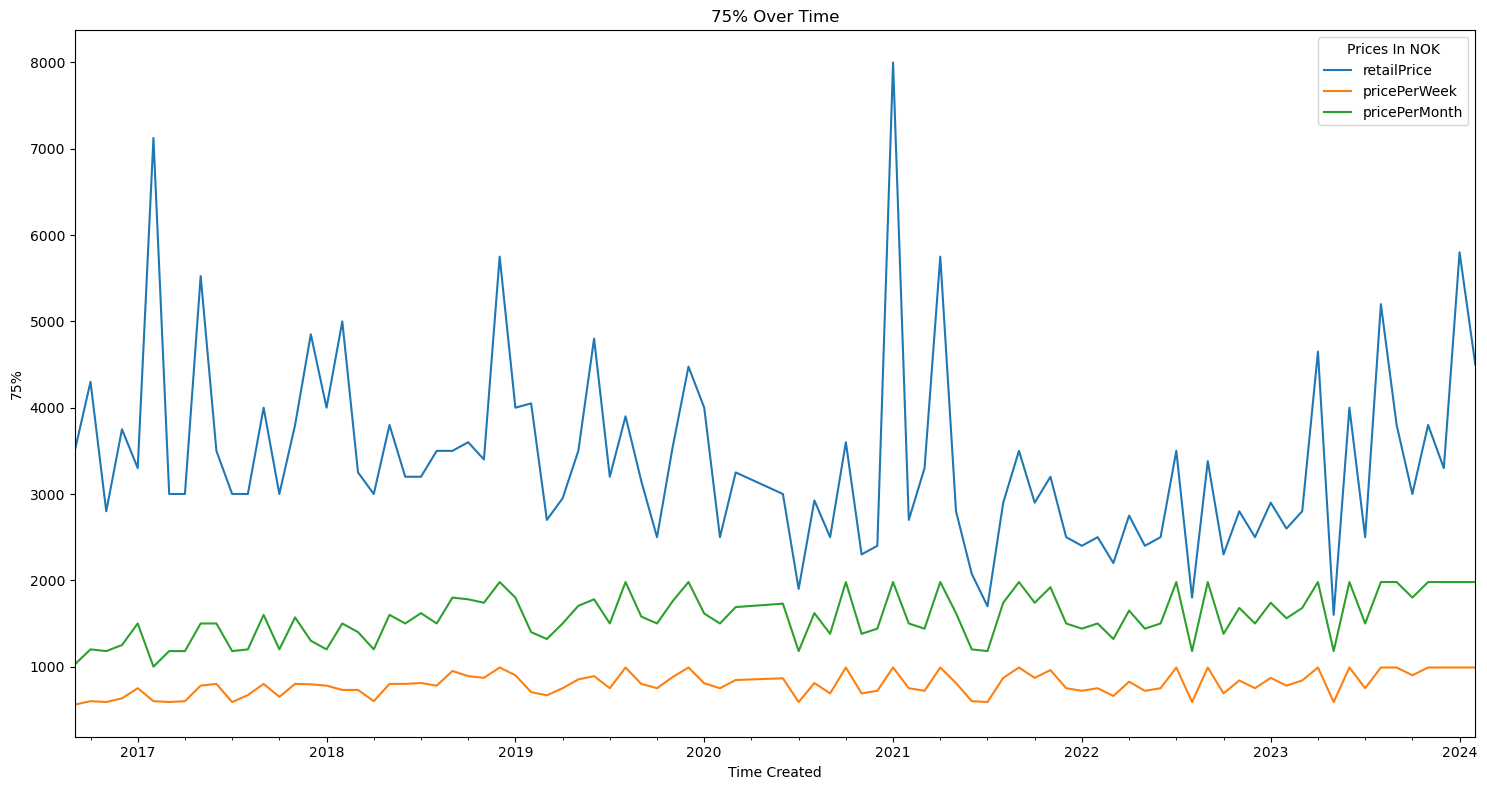

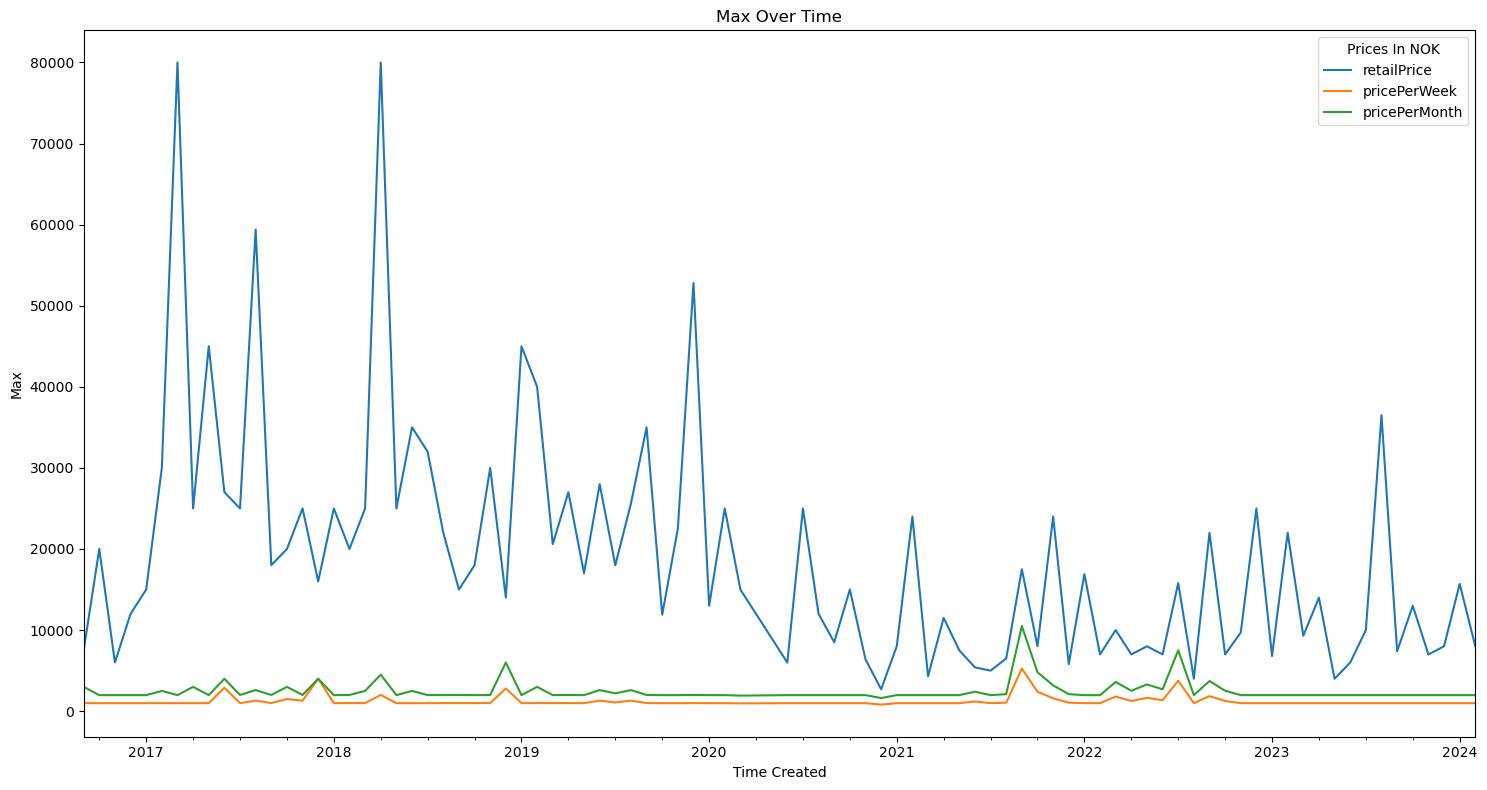

In [ ]:
# Group by month of creation and calculate the required statistics
outfits_per_month = outfits.groupby(outfits['timeCreated'].dt.to_period('M')).agg(['mean', 'std', 'min', 'median', 'max'])

# Calculate the 25th and 75th percentiles separately
quantiles = outfits.groupby(outfits['timeCreated'].dt.to_period('M')).quantile([0.25, 0.75]).unstack(level=-1)
quantiles.columns = pd.MultiIndex.from_product([quantiles.columns.levels[0], ['25%', '75%']])

# Merge the quantiles with the other statistics
outfits_per_month = pd.concat([outfits_per_month, quantiles], axis=1)

# Plotting each statistic over time for 'retailPrice', 'pricePerWeek', 'pricePerMonth'
stats = ['mean', 'std', 'min', '25%', 'median', '75%', 'max']
columns = ['retailPrice', 'pricePerWeek', 'pricePerMonth']

for stat in stats:
    plt.figure(figsize=(15, 8))
    for column in columns:
        outfits_per_month[column][stat].plot(label=column)
    plt.title(f'{stat.capitalize()} Over Time')
    plt.xlabel('Time Created')
    plt.ylabel(stat.capitalize())
    plt.legend(title='Prices In NOK')
    plt.tight_layout()
    plt.show()


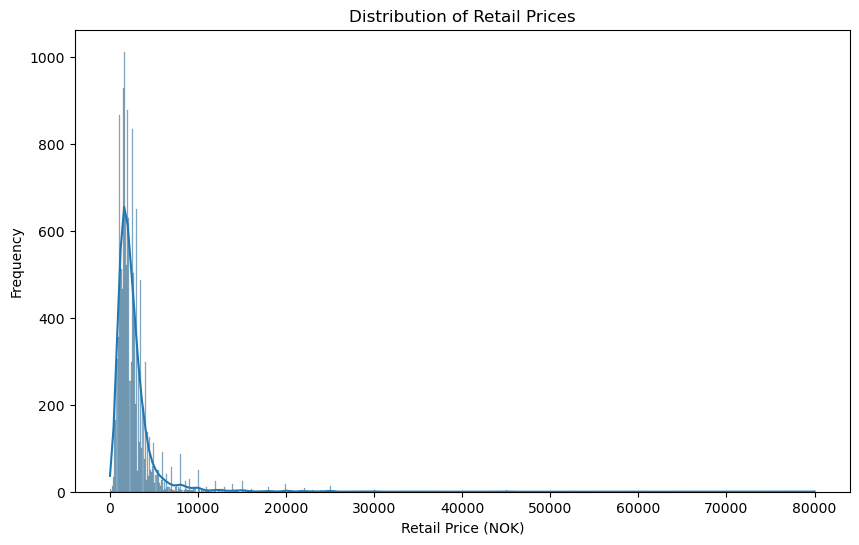

In [ ]:
# Distribution of Retail Prices
plt.figure(figsize=(10, 6))
sns.histplot(outfits['retailPrice'], kde=True)
plt.title('Distribution of Retail Prices')
plt.xlabel('Retail Price (NOK)')
plt.ylabel('Frequency')
plt.show()

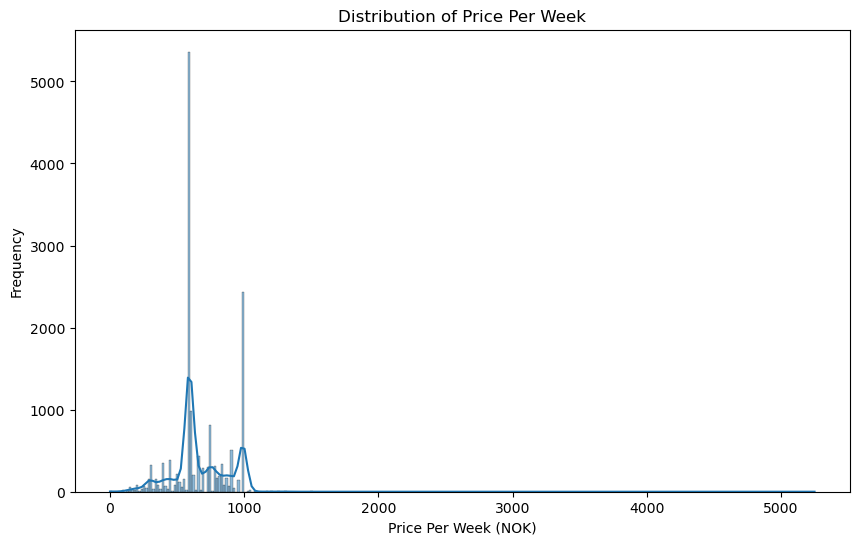

In [ ]:
# Distribution of Price Per Week
plt.figure(figsize=(10, 6))
sns.histplot(outfits['pricePerWeek'], kde=True)
plt.title('Distribution of Price Per Week')
plt.xlabel('Price Per Week (NOK)')
plt.ylabel('Frequency')
plt.show()

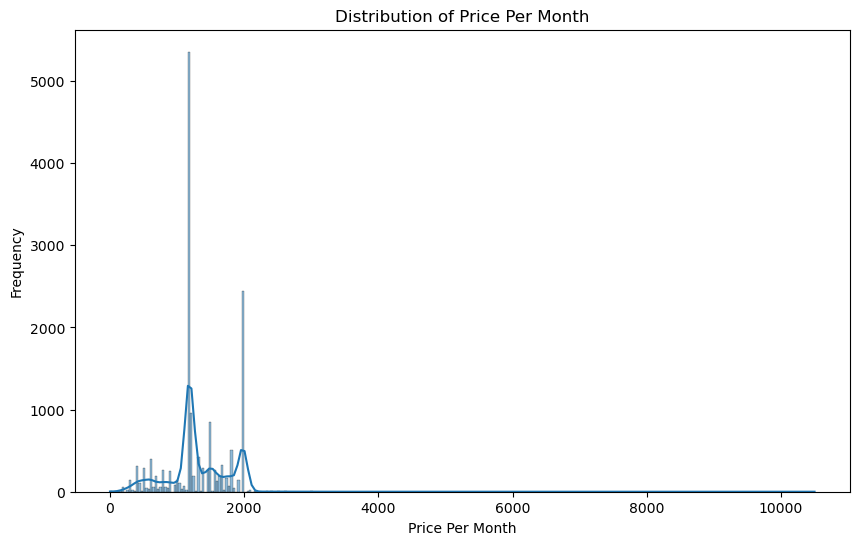

In [ ]:
# Distribution of Price Per Month
plt.figure(figsize=(10, 6))
sns.histplot(outfits['pricePerMonth'], kde=True)
plt.title('Distribution of Price Per Month')
plt.xlabel('Price Per Month')
plt.ylabel('Frequency')
plt.show()

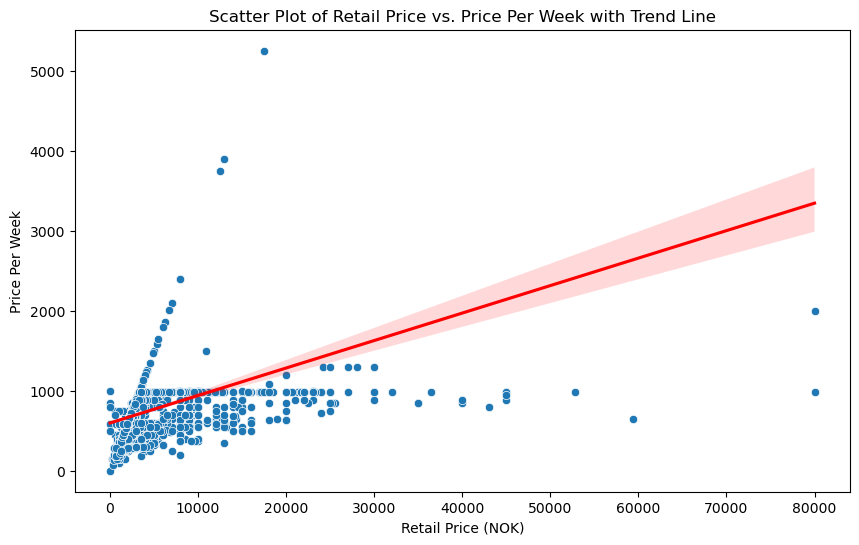

In [ ]:
# Scatter Plot of Retail Price vs. Price Per Week with Trend Line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='retailPrice', y='pricePerWeek', data=outfits)
sns.regplot(x='retailPrice', y='pricePerWeek', data=outfits, scatter=False, color='red')
plt.title('Scatter Plot of Retail Price vs. Price Per Week with Trend Line')
plt.xlabel('Retail Price (NOK)')
plt.ylabel('Price Per Week')
plt.show()

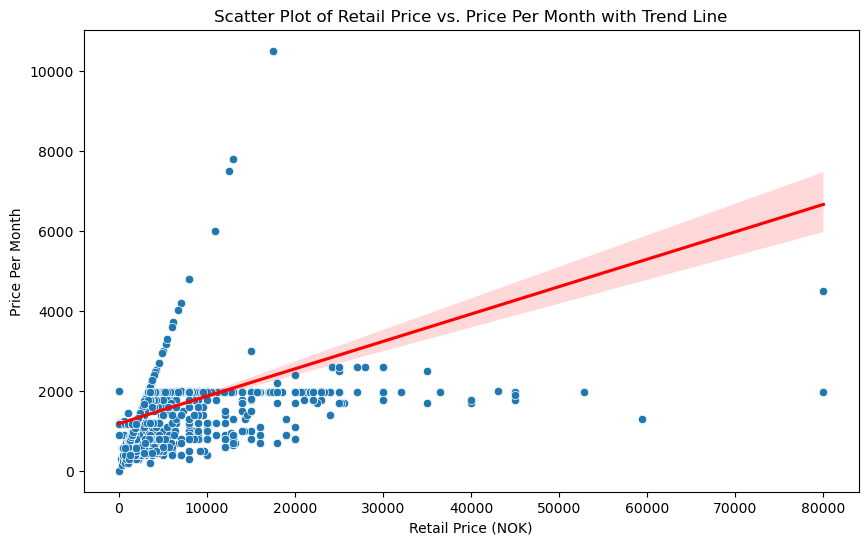

In [ ]:
# Scatter Plot of Retail Price vs. Price Per Month with Trend Line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='retailPrice', y='pricePerMonth', data=outfits)
sns.regplot(x='retailPrice', y='pricePerMonth', data=outfits, scatter=False, color='red')
plt.title('Scatter Plot of Retail Price vs. Price Per Month with Trend Line')
plt.xlabel('Retail Price (NOK)')
plt.ylabel('Price Per Month')
plt.show()

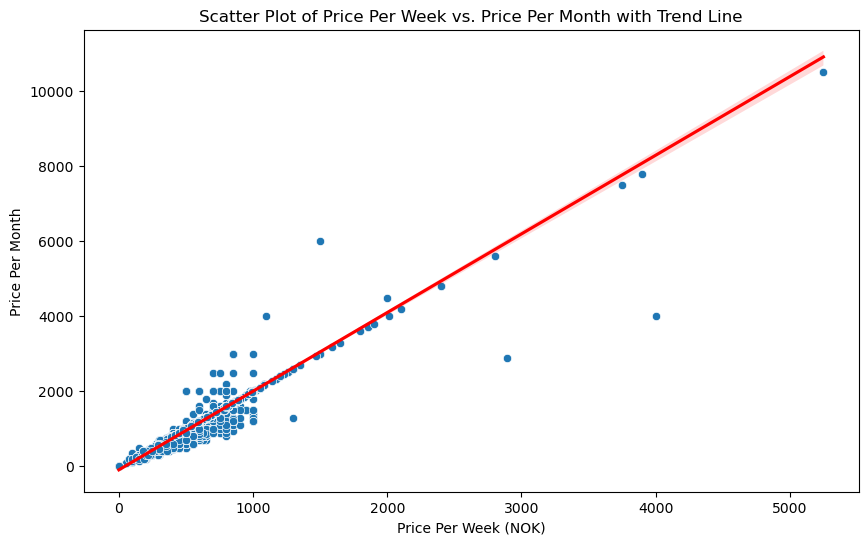

In [ ]:
# Scatter Plot of Price Per Week vs. Price Per Month with Trend Line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pricePerWeek', y='pricePerMonth', data=outfits)
sns.regplot(x='pricePerWeek', y='pricePerMonth', data=outfits, scatter=False, color='red')
plt.title('Scatter Plot of Price Per Week vs. Price Per Month with Trend Line')
plt.xlabel('Price Per Week (NOK)')
plt.ylabel('Price Per Month')
plt.show()